### Import library

In [1]:
import geopandas as gpd
import pandas as pd
from osgeo import ogr
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
import random
import seaborn as sns

### multicollinearity

In [13]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/0 all risk factors 77.csv")
outcome = pd.read_csv("datasets/Thai suicides/1 both 77.csv")
data["y"] = outcome["y"]
data = data[["x1", 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y']]
data.columns = ["debt", "income", "proportion of poverty", "monthly expenses", "homicides", "thefts & robberies", "violent crimes", "suicide"]
datacorr = data.corr()
datacorr

,debt,income,proportion of poverty,monthly expenses,homicides,thefts & robberies,violent crimes,suicide
debt,1.000000,1.000000,-0.483248,0.819208,0.311468,0.289696,0.238667,0.032131
income,1.000000,1.000000,-0.483248,0.819208,0.311468,0.289696,0.238667,0.032131
proportion of poverty,-0.483248,-0.483248,1.000000,-0.590823,-0.192988,-0.212576,-0.073716,-0.128608
monthly expenses,0.819208,0.819208,-0.590823,1.000000,0.312148,0.309613,0.242914,0.014020
homicides,0.311468,0.311468,-0.192988,0.312148,1.000000,0.972621,0.898633,0.463154
thefts & robberies,0.289696,0.289696,-0.212576,0.309613,0.972621,1.000000,0.889338,0.404771
violent crimes,0.238667,0.238667,-0.073716,0.242914,0.898633,0.889338,1.000000,0.362668
suicide,0.032131,0.032131,-0.128608,0.014020,0.463154,0.404771,0.362668,1.000000


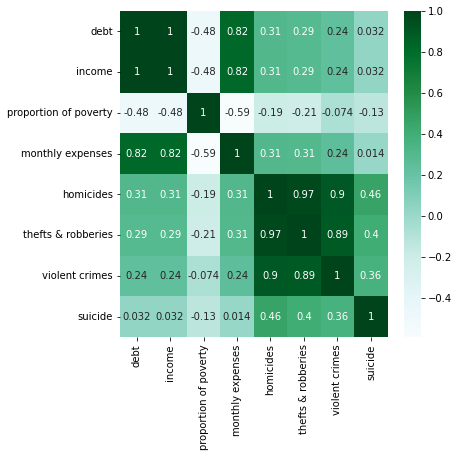

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
corr = sns.heatmap(datacorr, annot=True, cmap="BuGn")
plt.savefig('th_corr.png')

### Clean Thai data

In [20]:
suicide_counts = pd.read_excel("suicide_counts_female.xlsx")

In [21]:
suicide_counts.replace({"name": {"     Bangkok ": "Bangkok Metropolis",
                                     "     Samut Prakan ": "Samut Prakan",
                                     "     Nonthaburi ": "Nonthaburi",
                                     "     Pathum Thani ": "Pathum Thani",
                                     "     Phra Nakhon Si Ayutthaya ": "Phra Nakhon Si Ayutthaya",
                                     "     Ang Thong ": "Ang Thong",
                                     "     Lop Buri ": "Lop Buri",
                                     "     Sing Buri ": "Sing Buri",
                                     "     Chai Nat ": "Chai Nat",
                                     "     Saraburi ": "Saraburi",
                                     "     Chon Buri ": "Chon Buri",
                                     "     Rayong ": "Rayong",
                                     "     Chanthaburi ": "Chanthaburi",
                                     "     Trat ": "Trat",
                                     "     Chachoengsao ": "Chachoengsao",
                                     "     Prachin Buri ": "Prachin Buri",
                                     "     Nakhon Nayok ": "Nakhon Nayok",
                                     "     Sa Kaeo ": "Sa Kaeo",
                                     "     Nakhon Ratchasima ": "Nakhon Ratchasima",
                                     "     Buri Ram ": "Buri Ram",
                                     "     Surin ": "Surin",
                                     "     Si Sa Ket ": "Si Sa Ket",
                                     "     Ubon Ratchathani ": "Ubon Ratchathani",
                                     "     Yasothon ": "Yasothon",
                                     "     Chaiyaphum ": "Chaiyaphum",
                                     "     Amnat Charoen ": "Amnat Charoen",
                                     "     Bungkan ": "Bueng Kan",
                                     "     Nong Bua Lam Phu ": "Nong Bua Lam Phu",
                                     "     Khon Kaen ": "Khon Kaen",
                                     "     Udon Thani ": "Udon Thani",
                                     "     Loei ": "Loei",
                                     "     Nong Khai ": "Nong Khai",
                                     "     Maha Sarakham ": "Maha Sarakham",
                                     "     Roi Et ": "Roi Et",
                                     "     Kalasin ": "Kalasin",
                                     "     Sakon Nakhon ": "Sakon Nakhon",
                                     "     Nakhon Phanom ": "Nakhon Phanom",
                                     "     Mukdahan ": "Mukdahan",
                                     "     Chiang Mai ": "Chiang Mai",
                                     "     Lamphun ": "Lamphun",
                                     "     Lampang ": "Lampang",
                                     "     Uttaradit ": "Uttaradit",
                                     "     Phrae ": "Phrae",
                                     "     Nan ": "Nan",
                                     "     Phayao ": "Phayao",
                                     "     Chiang Rai ": "Chiang Rai",
                                     "     Mae Hong Son ": "Mae Hong Son",
                                     "     Nakhon Sawan ": "Nakhon Sawan",
                                     "     Uthai Thani ": "Uthai Thani",
                                     "     Kamphaeng Phet ": "Kamphaeng Phet",
                                     "     Tak ": "Tak",
                                     "     Sukhothai ": "Sukhothai",
                                     "     Phitsanulok ": "Phitsanulok",
                                     "     Phichit ": "Phichit",
                                     "     Phetchabun ": "Phetchabun",
                                     "     Ratchaburi ": "Ratchaburi",
                                     "     Kanchanaburi ": "Kanchanaburi",
                                     "     Suphan Buri ": "Suphan Buri",
                                     "     Nakhon Pathom ": "Nakhon Pathom",
                                     "     Samut Sakhon ": "Samut Sakhon",
                                     "     Samut Songkhram ": "Samut Songkhram",
                                     "     Phetchaburi ": "Phetchaburi",
                                     "     Prachuap Khiri Khan ": "Prachuap Khiri Khan",
                                     "     Nakhon Si Thammarat ": "Nakhon Si Thammarat",
                                     "     Krabi ": "Krabi",
                                     "     Phangnga ": "Phangnga",
                                     "     Phuket ": "Phuket",
                                     "     Surat Thani ": "Surat Thani",
                                     "     Ranong ": "Ranong",
                                     "     Chumphon ": "Chumphon",
                                     "     Songkhla ": "Songkhla",
                                     "     Satun ": "Satun",
                                     "     Trang ": "Trang",
                                     "     Phattalung ": "Phatthalung",
                                     "     Pattani ": "Pattani",
                                     "     Yala ": "Yala",
                                     "     Narathiwat ": "Narathiwat"
                                    }}, inplace=True)

In [22]:
suicide_counts.columns = ['name',         "2540",         "2541",         "2542",         "2543",
               "2544",         "2545",         "2546",         "2547",         "2548",
               "2549",         "2550",         "2551",         "2552",         "2553",
               "2554",         "2555",         "2556",         "2557",         "2558",
               "2559",         "2560",         "2561",         "2562",         "2563",
               "2564"]

In [23]:
suicide_counts.to_csv("counts_female.csv", index = False)

In [35]:
male_counts = pd.read_csv("counts_male.csv")
female_counts = pd.read_csv("counts_female.csv")

In [36]:
both_counts = pd.DataFrame(columns = male_counts.columns, index = range(77))
both_counts["name"] = male_counts["name"]
for i in range(77):
    for j in range(1, 26):
        both_counts.iloc[i, j] = male_counts.iloc[i, j] + female_counts.iloc[i, j]

In [37]:
both_counts.to_csv("counts_both.csv", index = False)

### Prepare Thai risk factors

In [29]:
data = pd.read_csv("datasets/Thai suicides/risk factors/shocking crime.csv")
data['Year'] = data['Year'].apply(lambda x: x - 543)
data

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Buri Ram,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
0,2007,17.0,39.0,1085.0,NaN,41.0,94.0,31.0,41.0,44.0,...,39.0,49.0,148.0,21.0,82.0,64.0,23.0,36.0,299.0,10.0
1,2008,10.0,20.0,962.0,NaN,58.0,90.0,18.0,39.0,45.0,...,43.0,53.0,193.0,18.0,60.0,48.0,32.0,38.0,74.0,9.0
2,2009,8.0,30.0,753.0,NaN,43.0,65.0,25.0,35.0,36.0,...,47.0,38.0,156.0,13.0,59.0,71.0,23.0,21.0,106.0,10.0
3,2010,10.0,25.0,539.0,NaN,52.0,56.0,26.0,29.0,58.0,...,39.0,40.0,118.0,19.0,38.0,73.0,18.0,18.0,161.0,18.0
4,2011,18.0,14.0,338.0,17.0,29.0,53.0,25.0,27.0,43.0,...,34.0,34.0,123.0,23.0,47.0,64.0,17.0,17.0,160.0,12.0
5,2012,5.0,23.0,561.0,20.0,26.0,73.0,19.0,29.0,31.0,...,35.0,36.0,118.0,17.0,43.0,44.0,23.0,25.0,113.0,8.0
6,2013,9.0,26.0,615.0,21.0,38.0,42.0,15.0,33.0,34.0,...,29.0,34.0,103.0,22.0,67.0,54.0,22.0,18.0,168.0,16.0
7,2014,4.0,21.0,579.0,8.0,23.0,36.0,15.0,27.0,17.0,...,27.0,35.0,119.0,13.0,46.0,55.0,9.0,16.0,164.0,11.0
8,2015,1.0,13.0,581.0,18.0,35.0,28.0,8.0,29.0,25.0,...,25.0,30.0,89.0,10.0,43.0,49.0,15.0,16.0,130.0,12.0
9,2016,12.0,15.0,362.0,15.0,37.0,19.0,12.0,43.0,18.0,...,26.0,32.0,68.0,13.0,39.0,39.0,8.0,17.0,120.0,14.0


In [30]:
data1 = data.iloc[0:4, :]
data1

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Buri Ram,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
0,2007,17.0,39.0,1085.0,NaN,41.0,94.0,31.0,41.0,44.0,...,39.0,49.0,148.0,21.0,82.0,64.0,23.0,36.0,299.0,10.0
1,2008,10.0,20.0,962.0,NaN,58.0,90.0,18.0,39.0,45.0,...,43.0,53.0,193.0,18.0,60.0,48.0,32.0,38.0,74.0,9.0
2,2009,8.0,30.0,753.0,NaN,43.0,65.0,25.0,35.0,36.0,...,47.0,38.0,156.0,13.0,59.0,71.0,23.0,21.0,106.0,10.0
3,2010,10.0,25.0,539.0,NaN,52.0,56.0,26.0,29.0,58.0,...,39.0,40.0,118.0,19.0,38.0,73.0,18.0,18.0,161.0,18.0


In [31]:
data2 = data.iloc[4:, :]
data2

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Buri Ram,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
4,2011,18.0,14.0,338.0,17.0,29.0,53.0,25.0,27.0,43.0,...,34.0,34.0,123.0,23.0,47.0,64.0,17.0,17.0,160.0,12.0
5,2012,5.0,23.0,561.0,20.0,26.0,73.0,19.0,29.0,31.0,...,35.0,36.0,118.0,17.0,43.0,44.0,23.0,25.0,113.0,8.0
6,2013,9.0,26.0,615.0,21.0,38.0,42.0,15.0,33.0,34.0,...,29.0,34.0,103.0,22.0,67.0,54.0,22.0,18.0,168.0,16.0
7,2014,4.0,21.0,579.0,8.0,23.0,36.0,15.0,27.0,17.0,...,27.0,35.0,119.0,13.0,46.0,55.0,9.0,16.0,164.0,11.0
8,2015,1.0,13.0,581.0,18.0,35.0,28.0,8.0,29.0,25.0,...,25.0,30.0,89.0,10.0,43.0,49.0,15.0,16.0,130.0,12.0
9,2016,12.0,15.0,362.0,15.0,37.0,19.0,12.0,43.0,18.0,...,26.0,32.0,68.0,13.0,39.0,39.0,8.0,17.0,120.0,14.0


In [32]:
data1.to_csv("datasets/Thai suicides/risk factors/76 provinces/shocking crime 76.csv", index = False)
data2.to_csv("datasets/Thai suicides/risk factors/77 provinces/shocking crime 77.csv", index = False)

In [87]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/homicide crime 77.csv")
data

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Buri Ram,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
0,2011,100.0,138.0,3163.0,97.0,361.0,313.0,145.0,305.0,221.0,...,356.0,175.0,299.0,150.0,397.0,350.0,136.0,159.0,317.0,113.0
1,2012,99.0,122.0,3795.0,73.0,387.0,347.0,137.0,303.0,273.0,...,350.0,133.0,311.0,130.0,448.0,327.0,124.0,153.0,241.0,106.0
2,2013,71.0,139.0,3508.0,114.0,356.0,255.0,152.0,248.0,256.0,...,333.0,281.0,284.0,146.0,421.0,311.0,135.0,130.0,301.0,109.0
3,2014,65.0,152.0,3517.0,76.0,340.0,479.0,119.0,236.0,465.0,...,293.0,182.0,340.0,206.0,377.0,320.0,119.0,139.0,332.0,96.0
4,2015,57.0,192.0,4326.0,87.0,399.0,407.0,132.0,273.0,380.0,...,351.0,156.0,352.0,173.0,397.0,273.0,118.0,135.0,283.0,108.0
5,2016,80.0,150.0,3068.0,56.0,336.0,311.0,97.0,193.0,268.0,...,323.0,143.0,255.0,111.0,327.0,216.0,87.0,100.0,244.0,107.0


In [81]:
df = pd.DataFrame(columns = data.columns, index = range(11))
df["Year"] = range(2011,2022)
df

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Bur iRam,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.loc[0] = data.loc[7]
df.loc[1] = data.loc[0]
df.loc[2] = data.loc[1]
df.loc[3] = data.loc[2]
df.loc[4] = data.loc[3]
df.loc[5] = data.loc[4]
df.loc[6] = data.loc[5]
df.loc[7] = data.loc[6]
df.loc[8] = data.loc[7]
df.loc[9] = data.loc[3]
df.loc[10] = data.loc[1]

df

,Year,Amnat Charoen,Ang Thong,Bangkok Metropolis,Bueng Kan,Bur iRam,Chachoengsao,Chai Nat,Chaiyaphum,Chanthaburi,...,Surin,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
0,2019,4.5323,17.3245,0.5906,1.2892,14.0554,5.384,17.8891,3.0375,8.8538,...,7.5023,21.1331,8.7261,9.7312,11.9212,4.0874,3.7454,6.0909,14.0142,10.1886
1,2012,22.121688,9.587018,1.911983,3.87035,31.610028,3.104669,21.799344,16.324703,13.892688,...,18.4155,35.928772,11.770855,20.596933,10.439117,9.955764,13.276584,24.069581,21.93191,23.206667
2,2013,19.34,8.78,1.06,3.01,25.35,1.84,13.21,15.83,13.0,...,10.82,34.0,9.21,17.47,24.25,7.22,18.58,17.83,22.42,20.49
3,2014,17.67,13.76,1.64,4.12,39.13,3.77,22.78,9.48,8.66,...,14.4,36.53,11.08,11.05,13.26,9.35,11.24,10.88,32.83,14.64
4,2015,14.26,14.52,2.01,2.34,23.34,2.44,19.64,5.64,3.69,...,9.79,24.48,7.39,11.37,11.54,4.56,3.85,8.46,21.04,17.32
5,2016,24.0,14.54,1.36,7.61,24.32,4.53,28.34,5.74,3.69,...,9.37,27.54,15.93,14.01,13.69,12.1,6.08,12.27,21.24,16.73
6,2017,14.1172,16.48,1.12,5.6021,20.9941,0.97,16.48,3.3194,6.12,...,13.5304,27.1819,11.6944,8.12,10.5975,8.3312,7.5495,10.4599,13.1093,15.2917
7,2108,23.55,23.4,1.41,11.94,21.01,2.84,27.72,8.55,5.43,...,17.51,28.97,12.55,14.83,8.31,10.45,9.3,17.43,23.28,12.68
8,2019,4.5323,17.3245,0.5906,1.2892,14.0554,5.384,17.8891,3.0375,8.8538,...,7.5023,21.1331,8.7261,9.7312,11.9212,4.0874,3.7454,6.0909,14.0142,10.1886
9,2015,14.26,14.52,2.01,2.34,23.34,2.44,19.64,5.64,3.69,...,9.79,24.48,7.39,11.37,11.54,4.56,3.85,8.46,21.04,17.32


In [84]:
df["Year"] = range(2011,2022)
df.to_csv("datasets/Thai suicides/risk factors/77 provinces/1 poverty rate 77.csv", index = False)

### Data cleaning

#### Shape file

In [2]:
map_data = gpd.read_file("datasets/Global suicides/global_map_256/global_map_256.shp") 
map_data.head()

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,geometry
0,Member State,WSM,Polynesia,WSM,Oceania,Samoa,WS,Samoa,"MULTIPOLYGON (((-171.42920 -14.01625, -171.441..."
1,Member State,BEL,Western Europe,BEL,Europe,Belgium,BE,Belgique,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ..."
2,Member State,BGD,Southern Asia,BGD,Asia,Bangladesh,BD,Bangladesh,"MULTIPOLYGON (((91.89749 21.47666, 91.88693 21..."
3,Member State,ISR,Western Asia,ISR,Asia,Israel,IL,IsraÃ«l,"POLYGON ((35.62364 33.24573, 35.63249 33.24637..."
4,Member State,NOR,Northern Europe,NOR,Europe,Norway,NO,NorvÃ¨ge,"MULTIPOLYGON (((5.28778 59.21889, 5.25597 59.1..."


#### Clean suicide data

In [150]:
suicide_data = pd.read_excel('datasets/Global suicides/unclean_age_adjusted.xlsx')
suicide_data = suicide_data.rename(columns={"Country": "name"})
suicide_data.head()

,name,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,6.0 [3.4-9.9],5.9 [3.4-9.8],6.0 [3.4-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.2 [3.6-10.2],6.2 [3.6-10.2],6.4 [3.8-10.5],...,6.8 [4.0-11.1],7.2 [4.2-11.7],7.4 [4.3-12.1],7.6 [4.4-12.3],7.6 [4.4-12.3],7.8 [4.5-12.6],7.7 [4.5-12.5],7.9 [4.5-12.8],7.9 [4.5-12.8],7.7 [4.4-12.5]
1,Albania,3.7 [2.1-5.7],3.9 [2.2-6.0],4.1 [2.3-6.3],4.2 [2.3-6.3],4.2 [2.3-6.4],4.5 [2.5-6.7],4.8 [2.7-7.1],4.8 [2.8-7.0],7.6 [4.7-10.7],...,8.0 [4.8-10.8],8.1 [5.0-10.8],8.1 [5.0-10.6],7.8 [5.0-10.2],7.7 [4.9-10.0],4.9 [3.1-6.3],4.9 [3.3-6.4],4.8 [3.2-6.3],4.7 [3.2-6.2],5.2 [3.6-6.9]
2,Algeria,2.6 [1.4-4.4],2.6 [1.4-4.4],2.5 [1.4-4.4],2.6 [1.4-4.5],2.7 [1.5-4.7],2.8 [1.5-4.8],2.9 [1.5-5.0],2.9 [1.6-5.0],2.9 [1.6-5.1],...,3.2 [1.7-5.6],3.3 [1.8-5.8],3.5 [1.8-6.0],3.7 [2.0-6.4],3.8 [2.0-6.6],4.0 [2.1-6.9],4.1 [2.2-7.1],4.4 [2.4-7.6],4.6 [2.4-7.9],4.7 [2.5-8.0]
3,Angola,12.6 [7.7-19.4],12.4 [7.6-19.0],12.4 [7.6-18.9],12.9 [8.0-19.6],13.3 [8.3-20.1],13.1 [8.3-19.8],14.2 [9.0-21.2],14.2 [9.0-21.2],13.5 [8.6-20.2],...,13.6 [8.7-20.5],15.3 [9.7-23.0],15.0 [9.5-22.6],17.1 [10.8-25.6],16.3 [10.3-24.4],17.2 [10.8-25.9],17.5 [10.8-26.6],17.2 [10.7-26.3],17.5 [10.6-26.7],17.6 [10.5-27.0]
4,Antigua and Barbuda,0.3 [0.2-0.5],0.3 [0.2-0.5],0.0 [0.0-0.0],0.5 [0.3-0.7],0.4 [0.3-0.6],0.4 [0.3-0.6],0.0 [0.0-0.0],0.0 [0.0-0.0],0.2 [0.1-0.2],...,0.0 [0.0-0.0],0.2 [0.2-0.3],0.3 [0.2-0.5],0.4 [0.3-0.6],1.3 [0.9-1.8],2.0 [1.4-2.7],1.4 [1.0-2.0],1.3 [0.9-1.7],1.9 [1.3-2.6],2.0 [1.4-2.7]


In [151]:
def slice(st):
    return float(str(st)[0:3])

suicide_data.iloc[:,1:] = suicide_data.iloc[:,1:].applymap(slice)

suicide_data.head()

,name,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,6.4,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Albania,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,7.6,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
2,Algeria,2.6,2.6,2.5,2.6,2.7,2.8,2.9,2.9,2.9,...,3.2,3.3,3.5,3.7,3.8,4.0,4.1,4.4,4.6,4.7
3,Angola,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,13.0,...,13.0,15.0,15.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0
4,Antigua and Barbuda,0.3,0.3,0.0,0.5,0.4,0.4,0.0,0.0,0.2,...,0.0,0.2,0.3,0.4,1.3,2.0,1.4,1.3,1.9,2.0


#### Find and correct unmatched row(s) between Shape file and Suicide data

In [152]:
map_col = map_data.loc[:, "name"]
map = map_col.tolist()
len(map)

256

In [153]:
data_col = suicide_data.loc[:, "name"]
data = data_col.tolist()
len(data)

183

In [160]:
for i in map:
  for j in data:
    if i == j :
      map.remove(i)
      data.remove(j)

In [161]:
print("we have", len(map), "unmatch rows in Shape file")
print("we have", len(data), "unmatch rows in Suicide data")

we have 87 unmatch rows in Shape file
we have 14 unmatch rows in Suicide data


In [162]:
suicide_data = suicide_data.replace({ "Antigua and Barbuda":"Antigua & Barbuda",
                                        'Bolivia (Plurinational State of)':"Bolivia",
                                        "Bosnia and Herzegovina":"Bosnia & Herzegovina",
                                        "Cabo Verde":"Cape Verde",
                                        "Czechia":"Czech Republic",
                                        "Côte d'Ivoire":"CÃ´te d'Ivoire",
                                        "Eswatini":"Swaziland",
                                        "Libya":"Libyan Arab Jamahiriya",
                                        "North Macedonia":"The former Yugoslav Republic of Macedonia",
                                        "Republic of Moldova":"Moldova, Republic of",
                                        "Türkiye":"Turkey",
                                        "United Kingdom of Great Britain and Northern Ireland":"U.K. of Great Britain and Northern Ireland",
                                        "Venezuela (Bolivarian Republic of)":"Venezuela",
                                        "Viet Nam":"Vietnam"})
suicide_data.head()

,name,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,6.4,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Albania,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,7.6,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
2,Algeria,2.6,2.6,2.5,2.6,2.7,2.8,2.9,2.9,2.9,...,3.2,3.3,3.5,3.7,3.8,4.0,4.1,4.4,4.6,4.7
3,Angola,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,13.0,...,13.0,15.0,15.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0
4,Antigua & Barbuda,0.3,0.3,0.0,0.5,0.4,0.4,0.0,0.0,0.2,...,0.0,0.2,0.3,0.4,1.3,2.0,1.4,1.3,1.9,2.0


In [163]:
map_col = map_data.loc[:, "name"]
map = map_col.tolist()
len(map)

256

In [165]:
data_col = suicide_data.loc[:, "name"]
data = data_col.tolist()
len(data)

183

In [171]:
for i in map:
  for j in data:
    if i == j :
      map.remove(i)
      data.remove(j)

In [172]:
print("we have", len(map), "unmatch row(s) in Shape file")
print("we have", len(data), "unmatch row(s) in Suicide data")

we have 73 unmatch row(s) in Shape file
we have 0 unmatch row(s) in Suicide data


In [68]:
# save .shp 183 countries matched with suicides data
matched_map = map_data.loc[map_data['name'].isin(data)]
matched_map.to_file("countries.shp")

#### Plot unmatched location

C:\Users\USER\AppData\Local\Temp/ipykernel_54980/2045220190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country["score"] = 10
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


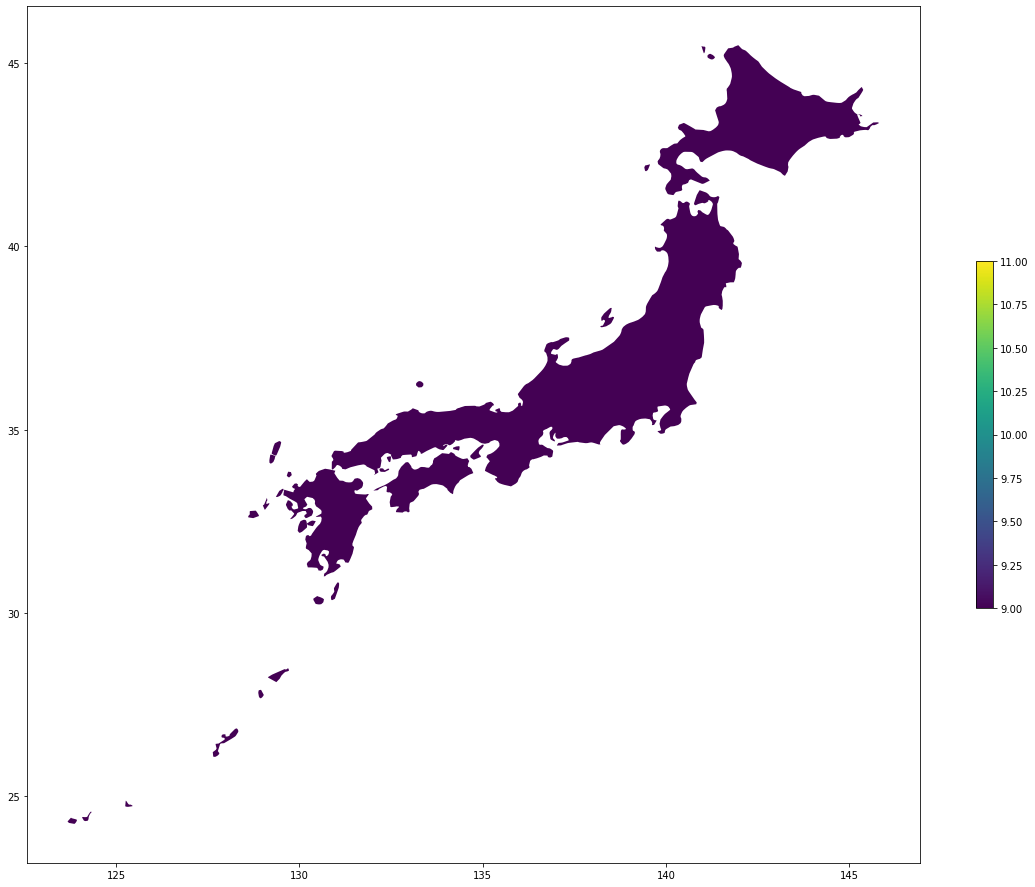

In [122]:
Country = map_data.loc[map_data['name'] == "Japan"]
Country["score"] = 10
plotmap = Country.plot(column = 'score', 
                       legend = True, legend_kwds = {'shrink': 0.32},
                       figsize=(20, 20))

plt.show()

In [123]:
unmatched_map = map_data.loc[map_data['name'].isin(map)]
unmatched_map['score'] = 10
unmatched_map.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_54980/753484173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_map['score'] = 10


,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,geometry,score
6,UK Non-Self-Governing Territory,AIA,Caribbean,AIA,Americas,Anguilla,AI,Anguilla,"POLYGON ((-63.15375 18.16528, -63.16778 18.164...",10
14,UK Non-Self-Governing Territory,GBR,Polynesia,PCN,Oceania,Pitcairn Island,PN,Pitcairn Island,"MULTIPOLYGON (((-130.07693 -25.07972, -130.081...",10
15,Member State,KNA,Caribbean,KNA,Americas,Saint Kitts and Nevis,KN,Saint-Kitts-et-Nevis,"POLYGON ((-62.70167 17.33694, -62.62251 17.241...",10
16,FR Territory,FRA,None,ATF,Antarctica,French Southern and Antarctic Territories,TF,French Southern and Antarctic Territories,"MULTIPOLYGON (((69.26471 -49.09112, 69.21554 -...",10
22,UK Territory,IOT,Eastern Africa,IOT,Africa,British Indian Ocean Territory,IO,British Indian Ocean Territory,"POLYGON ((72.48720 -7.38194, 72.43817 -7.43625...",10


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


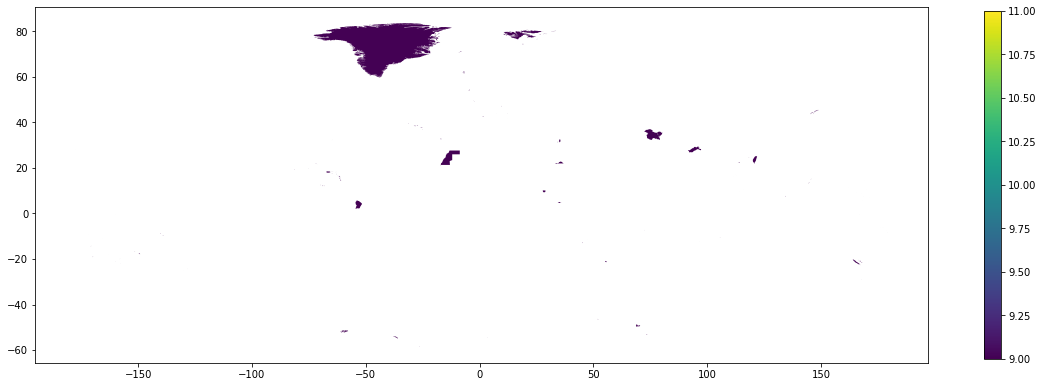

<Figure size 864x360 with 0 Axes>

In [124]:
plotmap = unmatched_map.plot(column = 'score', 
                       legend = True, legend_kwds = {'shrink': 0.32},
                       figsize=(20, 20))

plt.show()

plt.savefig("missdata_map_global.png", dpi=300) # save file ออก
#files.download('missdata_map_global.png')

### Melt table

#### global data

In [52]:
map_data = gpd.read_file("datasets/Global suicides/countries181/countries181.shp") 

In [53]:
data = pd.read_csv("datasets/Global suicides/age_adjusted_male_181.csv")

data = data.replace({ "Antigua and Barbuda":"Antigua & Barbuda",
                                        'Bolivia (Plurinational State of)':"Bolivia",
                                        "Bosnia and Herzegovina":"Bosnia & Herzegovina",
                                        "Cabo Verde":"Cape Verde",
                                        "Czechia":"Czech Republic",
                                        "Côte d'Ivoire":"CÃ´te d'Ivoire",
                                        "Eswatini":"Swaziland",
                                        "Libya":"Libyan Arab Jamahiriya",
                                        "North Macedonia":"The former Yugoslav Republic of Macedonia",
                                        "Republic of Moldova":"Moldova, Republic of",
                                        "Türkiye":"Turkey",
                                        "United Kingdom of Great Britain and Northern Ireland":"U.K. of Great Britain and Northern Ireland",
                                        "Venezuela (Bolivarian Republic of)":"Venezuela",
                                        "Viet Nam":"Vietnam"})

data['country'] = np.arange(data.shape[0])
data['country'] = data['country'].apply(lambda x: x + 1)

data.rename(columns={'2019' : 20, '2018' : 19, '2017' : 18, '2016' : 17, '2015' : 16,
                   '2014' : 15, '2013' : 14, '2012' : 13, '2011' : 12, '2010' : 11,
                   '2009' : 10, '2008' : 9, '2007' : 8, '2006' : 7, '2005' : 6,
                   '2004' : 5,  '2003' : 4, '2002' : 3, '2001' : 2, '2000' : 1}, inplace = True )

data = map_data.merge(data, on = "name")

data = data[['name', 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 'country']]

data

,name,20,19,18,17,16,15,14,13,12,...,9,8,7,6,5,4,3,2,1,country
0,Afghanistan,6.2,6.2,6.3,6.2,6.1,6.1,6.3,6.4,6.6,...,7.4,7.7,7.8,7.8,7.9,7.8,8.0,7.9,7.6,1
1,Albania,5.3,5.6,5.7,5.7,5.7,6.2,6.5,6.6,7.3,...,10.5,10.5,10.1,10.2,6.7,6.6,6.6,6.5,7.6,2
2,Algeria,3.3,3.2,3.2,3.3,3.4,3.5,3.6,3.7,3.7,...,4.2,4.4,4.6,4.8,5.0,5.2,5.6,5.7,5.9,3
3,Angola,21.7,21.3,21.0,21.8,22.7,22.6,24.3,24.1,22.8,...,25.5,25.2,28.4,27.1,28.6,29.1,29.0,29.8,30.0,4
4,Antigua & Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.5,0.7,0.9,2.9,4.3,3.2,2.8,4.2,4.5,5
5,Argentina,13.5,14.9,14.3,13.6,13.5,15.1,14.2,15.0,14.0,...,14.5,13.7,14.5,14.2,14.5,16.4,17.2,17.6,16.0,6
6,Armenia,4.9,2.9,4.7,8.1,7.6,6.8,7.2,10.3,9.0,...,6.8,8.3,8.7,6.4,6.1,4.3,5.7,5.3,5.5,7
7,Australia,17.0,17.1,17.7,16.3,17.7,17.0,15.3,15.4,15.2,...,16.3,14.9,14.6,15.9,14.6,15.1,16.2,17.6,18.8,8
8,Austria,16.6,18.0,17.5,17.1,17.9,19.0,18.0,19.3,19.4,...,18.8,19.5,20.5,21.2,22.3,22.5,24.9,23.0,24.9,9
9,Azerbaijan,6.6,6.5,6.5,6.5,6.6,6.8,7.0,7.1,7.3,...,7.9,8.2,8.0,7.7,7.4,6.7,6.5,6.2,5.8,10


In [54]:
melt_data = pd.melt(data, id_vars=['name', "country"],
                    value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

melt_data.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)


In [55]:
melt_data.astype({'name' : 'category', 'country' : 'float', 'year' : 'float', 'y' : 'float'}).dtypes
melt_data.to_csv("datasets/Global suicides/age_adjusted_male_melt_181.csv", index = False)

#### Thai data

In [28]:
data = pd.read_csv("datasets/Thai suicides/counts_female.csv")
data.fillna(0, inplace=True)

for i in range(24) :
    data.iloc[34, i+1] = data.iloc[34, i+1] + data.iloc[3, i+1]

data.drop(3, inplace=True)
data.reset_index(drop=True, inplace=True)

pop = pd.read_csv("datasets/Thai suicides/female-mid-year-pop40-64.csv")
pop.fillna(0, inplace=True)

for i in range(24) :
    pop.iloc[34, i+1] = pop.iloc[34, i+1] + pop.iloc[3, i+1]

pop.drop(3, inplace=True)
pop.reset_index(drop=True, inplace=True)

overall_mean = (sum(data.iloc[:, 1:].sum())/sum(pop.iloc[:, 1:].sum()))

data = data[['name', '1997', '1998', '1999', '2000', '2001', '2002',
 '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
 '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

data['province'] = np.arange(data.shape[0])
data['province'] = data['province'].apply(lambda x: x + 1)

data.rename(columns={
    '1997' : 1, '1998' : 2, '1999' : 3, '2000' : 4, '2001' : 5,
    '2002' : 6, '2003' : 7, '2004' : 8, '2005' : 9, '2006' : 10,
    '2007' : 11, '2008' : 12, '2009' : 13, '2010' : 14, '2011' : 15,
    '2012' : 16, '2013' : 17, '2014' : 18, '2015' : 19, '2016' : 20,
    '2017' : 21,  '2018' : 22, '2019' : 23, '2020' : 24, '2021' : 25 }, inplace = True )

melt_data = pd.melt(data, id_vars=['name', "province"],
                    value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                    16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
melt_data.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

melt_pop = pd.melt(pop, id_vars=['name'],
                    value_vars=['2540', '2541', '2542', '2543', '2544', '2545', '2546', '2547',
                    '2548', '2549', '2550', '2551', '2552', '2553', '2554', '2555', '2556', '2557', '2558',
                    '2559', '2560', '2561', '2562', '2563', '2564'])

melt_data["population"] = melt_pop["value"]
melt_data["E"] = melt_data["population"].apply(lambda x: x*overall_mean)

melt_data.astype({'name' : 'category', 'province' : 'int', 'year' : 'int', 'y' : 'int','population' : 'int', 'E' : 'int'}).dtypes
melt_data.to_csv("datasets/Thai suicides/female.csv", index = False)

In [25]:
data = pd.read_csv("datasets/Thai suicides/counts_both.csv")
pop = pd.read_csv("datasets/Thai suicides/both-mid-year-pop40-64.csv")

overall_mean = (sum(data.iloc[:, 1:].sum())/sum(pop.iloc[:, 1:].sum()))

data = data[['name', '1997', '1998', '1999', '2000', '2001', '2002',
 '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
 '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# data 76 provinces 1997-2010
data1 = data.iloc[:, :15]
# drop
data1 = data1.drop(3)
data1.reset_index(drop=True, inplace= True)

data1['province'] = np.arange(data1.shape[0])
data1['province'] = data1['province'].apply(lambda x: x + 1)

data1.rename(columns={
    '1997' : 1, '1998' : 2, '1999' : 3, '2000' : 4, '2001' : 5,
    '2002' : 6, '2003' : 7, '2004' : 8, '2005' : 9, '2006' : 10,
    '2007' : 11, '2008' : 12, '2009' : 13, '2010' : 14, }, inplace = True )

# pop 76 provinces 1997-2010
pop1 = pop.iloc[:, :15]
# drop
pop1 = pop1.drop(3)
pop1.reset_index(drop=True, inplace= True)

# data 77 provinces 2011-2021
data2 = data.iloc[:, 15:]

data2.reset_index(drop=True, inplace= True)
data2["name"] = data["name"]

data2['province'] = np.arange(data2.shape[0])
data2['province'] = data2['province'].apply(lambda x: x + 1)
data2.rename(columns={
    '2011' : 1,  '2012' : 2, '2013' : 3, '2014' : 4, '2015' : 5, '2016' : 6,
    '2017' : 7,  '2018' : 8, '2019' : 9, '2020' : 10, '2021' : 11}, inplace = True )

# pop 77 provinces 2011-2021
pop2 = pop.iloc[:, 15:]
pop2["name"] = pop["name"]
pop2.reset_index(drop=True, inplace= True)

melt_data1 = pd.melt(data1, id_vars=['name', "province"],
                    value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
melt_data1.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

melt_pop1 = pd.melt(pop1, id_vars=['name'],
                    value_vars=['2540', '2541', '2542', '2543', '2544', '2545', '2546', '2547',
                    '2548', '2549', '2550', '2551', '2552', '2553'])

melt_data1["population"] = melt_pop1["value"]
melt_data1["E"] = melt_data1["population"].apply(lambda x: x*overall_mean)

melt_data2 = pd.melt(data2, id_vars=['name', "province"],
                    value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
melt_data2.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

melt_pop2 = pd.melt(pop2, id_vars=['name'],
                    value_vars=['2554', '2555', '2556', '2557', '2558',
                    '2559', '2560', '2561', '2562', '2563', '2564'])

melt_data2["population"] = melt_pop2["value"]
melt_data2["E"] = melt_data2["population"].apply(lambda x: x*overall_mean)

melt_data1.astype({'name' : 'category', 'province' : 'int', 'year' : 'int', 'y' : 'int','population' : 'int', 'E' : 'int'}).dtypes
melt_data1.to_csv("datasets/Thai suicides/2 both 76.csv", index = False)
melt_data2.astype({'name' : 'category', 'province' : 'int', 'year' : 'int', 'y' : 'int','population' : 'int', 'E' : 'int'}).dtypes
melt_data2.to_csv("datasets/Thai suicides/2 both 77.csv", index = False)

In [83]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/0 poverty rate 77.csv")
data['Year'] = data['Year'].apply(lambda x: x - 2010)
data.columns = range(78)
data.rename(columns = { 0 : 'year'}, inplace = True)

melt_data = pd.melt(data, id_vars=['year'], value_vars = range(1,78))
melt_data.rename(columns={"variable" : "province", "value" : "x"}, inplace = True)

melt_data.sort_values(by = ['year', 'province'], inplace = True)
melt_data.to_csv("datasets/Thai suicides/risk factors/77 provinces/1 poverty rate 77.csv", index = False)

In [32]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/0 all risk factors 77.csv")

N = 34
B = 3
for i in range(7) :
    data.iloc[N, i] = data.iloc[N, i] + data.iloc[B, i]
    N += 77 
    B += 77

x = 3
while x !=  850:
    data.drop(x, inplace=True)
    x += 77

data

,x1,x2,x3,x4,x5,x6,x7
0,15816.295208,15619.295208,19.465428,14093.591220,93.803267,103.259996,11.132917
1,23426.868027,23229.868027,11.370984,19134.752798,132.802670,249.675410,21.027569
2,49759.274251,49562.274251,3.971482,31896.109841,3478.753667,9877.476599,493.980976
4,16775.131389,16578.131389,34.641094,13042.213934,370.039319,279.426377,28.979629
5,26257.958098,26060.958098,4.781991,20829.424252,325.956155,956.091966,62.991808
...,...,...,...,...,...,...,...
842,25454.977461,25257.977461,6.712360,30506.270996,171.799921,371.360346,34.148120
843,23302.910042,23105.910042,3.962674,23866.781371,77.163457,71.663962,6.758570
844,23139.968222,22942.968222,7.977242,21975.764717,84.386137,134.992120,13.473962
845,10747.176336,10550.176336,18.491871,10899.736118,248.055302,1115.498036,116.100956


In [33]:
data2 = pd.read_csv("datasets/Thai suicides/risk factors/76 provinces/0 all risk factors 76.csv")
data = data2.append(data)
data

C:\Users\USER\AppData\Local\Temp/ipykernel_42292/758260564.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data2.append(data)


,x1,x2,x3,x4,x5,x6,x7
0,38364.361183,7143.900893,15.638104,4845.039257,162.206231,515.033977,45.238689
1,21972.914710,8913.934168,15.522028,4894.774670,660.680914,710.809843,73.994749
2,129689.717383,23490.157272,14.056663,17528.102507,13765.206287,46483.528701,9258.594351
3,50773.884211,6948.957646,16.252556,3751.550395,2062.088408,5876.865585,46.581224
4,92136.698345,12505.594739,15.255129,8777.714835,1147.577923,2692.967185,340.669090
...,...,...,...,...,...,...,...
842,25454.977461,25257.977461,6.712360,30506.270996,171.799921,371.360346,34.148120
843,23302.910042,23105.910042,3.962674,23866.781371,77.163457,71.663962,6.758570
844,23139.968222,22942.968222,7.977242,21975.764717,84.386137,134.992120,13.473962
845,10747.176336,10550.176336,18.491871,10899.736118,248.055302,1115.498036,116.100956


In [35]:
data.to_csv("datasets/Thai suicides/risk factors/all risk factors.csv", index = False)

### sample data preparing

In [ ]:
data = pd.read_csv("datasets/Thai suicides/counts_both.csv")

data['province'] = np.arange(data.shape[0])
data['province'] = data['province'].apply(lambda x: x + 1)

data.rename(columns={'2011' : 1, '2012' : 2, '2013' : 3, '2014' : 4, '2015' : 5, '2016' : 6}, inplace = True )

data2 = data.iloc[:, 15:]
data2["name"] = data["name"]

melt_data = pd.melt(data2, id_vars=['name', "province"],
                    value_vars=[1, 2, 3, 4, 5, 6])

melt_data.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

data = pd.read_csv("datasets/Thai suicides/crude_both.csv")

data['province'] = np.arange(data.shape[0])
data['province'] = data['province'].apply(lambda x: x + 1)

data.rename(columns={'2011' : 1,'2012' : 2, '2013' : 3, '2014' : 4, '2015' : 5, '2016' : 6}, inplace = True )

data2 = data.iloc[:, 15:]

melt_data2 = pd.melt(data2, id_vars=["province"],
                    value_vars=[1, 2, 3, 4, 5, 6])

melt_data2.rename(columns={"variable" : "year", "value" : "E"}, inplace = True)
melt_data2

melt_data["E"] = melt_data2["E"]

melt_data.astype({'name' : 'category', 'province' : 'float', 'year' : 'float', 'y' : 'float', 'E' : 'float'}).dtypes
melt_data.to_csv("datasets/Thai suicides/both_melt_6_years.csv", index = False)
melt_data

In [6]:
data = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/shocking crime 77.csv")
data['Year'] = data['Year'].apply(lambda x: x - 2010)

data.columns = range(78)
data.rename(columns = { 0 : 'year'}, inplace = True)

melt_data = pd.melt(data, id_vars=['year'], value_vars = range(1,78))
melt_data.rename(columns={"variable" : "province", "value" : "x1"}, inplace = True)

data2 = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/homicide crime 77.csv")
data2['Year'] = data2['Year'].apply(lambda x: x - 2010)

data2.columns = range(78)
data2.rename(columns = { 0 : 'year'}, inplace = True)

melt_data2 = pd.melt(data2, id_vars=['year'], value_vars = range(1,78))
melt_data2.rename(columns={"variable" : "province", "value" : "x2"}, inplace = True)

data3 = pd.read_csv("datasets/Thai suicides/risk factors/77 provinces/property crime 77.csv")
data3['Year'] = data3['Year'].apply(lambda x: x - 2010)

data3.columns = range(78)
data3.rename(columns = { 0 : 'year'}, inplace = True)

melt_data3 = pd.melt(data3, id_vars=['year'], value_vars = range(1,78))
melt_data3.rename(columns={"variable" : "province", "value" : "x3"}, inplace = True)

melt_data["x2"] = melt_data2["x2"]
melt_data["x3"] = melt_data3["x3"]

melt_data.sort_values(by = ['year', 'province'], inplace = True)
melt_data.to_csv("datasets/Thai suicides/risk_factors_77_melt_6_years.csv", index = False)

#### Male

In [9]:
data_m = pd.read_csv("datasets/Global suicides/age_adjusted_male_181.csv")

data_m['country'] = np.arange(data_m.shape[0])
data_m['country'] = data_m['country'].apply(lambda x: x + 1)

data_m.rename(columns={'2019' : 20, '2018' : 19, '2017' : 18, '2016' : 17, '2015' : 16,
                   '2014' : 15, '2013' : 14, '2012' : 13, '2011' : 12, '2010' : 11,
                   '2009' : 10, '2008' : 9, '2007' : 8, '2006' : 7, '2005' : 6,
                   '2004' : 5,  '2003' : 4, '2002' : 3, '2001' : 2, '2000' : 1}, inplace = True )

data_m

,name,20,19,18,17,16,15,14,13,12,...,9,8,7,6,5,4,3,2,1,country
0,Afghanistan,6.2,6.2,6.3,6.2,6.1,6.1,6.3,6.4,6.6,...,7.4,7.7,7.8,7.8,7.9,7.8,8.0,7.9,7.6,1
1,Albania,5.3,5.6,5.7,5.7,5.7,6.2,6.5,6.6,7.3,...,10.5,10.5,10.1,10.2,6.7,6.6,6.6,6.5,7.6,2
2,Algeria,3.3,3.2,3.2,3.3,3.4,3.5,3.6,3.7,3.7,...,4.2,4.4,4.6,4.8,5.0,5.2,5.6,5.7,5.9,3
3,Angola,21.7,21.3,21.0,21.8,22.7,22.6,24.3,24.1,22.8,...,25.5,25.2,28.4,27.1,28.6,29.1,29.0,29.8,30.0,4
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.5,0.7,0.9,2.9,4.3,3.2,2.8,4.2,4.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela (Bolivarian Republic of),3.7,3.9,3.9,3.9,4.1,4.0,4.5,6.0,6.9,...,6.5,7.0,7.5,8.3,8.7,9.7,10.7,11.5,11.3,177
177,Viet Nam,10.6,10.8,11.1,11.2,11.3,11.3,11.1,11.1,10.9,...,10.6,10.3,9.9,9.6,9.6,9.4,9.3,9.5,9.4,178
178,Yemen,9.0,9.0,8.7,9.0,8.7,9.0,9.0,9.1,9.1,...,9.8,9.8,9.8,10.0,10.2,10.1,10.2,10.4,10.5,179
179,Zambia,25.7,28.1,29.1,29.1,30.0,30.2,30.0,31.1,33.4,...,32.8,33.4,35.6,35.8,35.8,34.2,34.5,34.3,35.9,180


In [10]:
melt_data_m = pd.melt(data_m, id_vars=['name', "country"],
                      value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
                      
melt_data_m.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

In [11]:
melt_data_m.astype({'name' : 'category', 'country' : 'float', 'year' : 'float', 'y' : 'float'}).dtypes
melt_data_m.to_csv("datasets/Global suicides/age_adjusted_male_melt_181.csv", index = False)

#### Female

In [12]:
data_f = pd.read_csv("datasets/Global suicides/age_adjusted_female_181.csv")

data_f['country'] = np.arange(data_f.shape[0])
data_f['country'] = data_f['country'].apply(lambda x: x + 1)

data_f.rename(columns={'2019' : 20, '2018' : 19, '2017' : 18, '2016' : 17, '2015' : 16,
                   '2014' : 15, '2013' : 14, '2012' : 13, '2011' : 12, '2010' : 11,
                   '2009' : 10, '2008' : 9, '2007' : 8, '2006' : 7, '2005' : 6,
                   '2004' : 5,  '2003' : 4, '2002' : 3, '2001' : 2, '2000' : 1}, inplace = True )

data_f

,name,20,19,18,17,16,15,14,13,12,...,9,8,7,6,5,4,3,2,1,country
0,Afghanistan,5.7,5.6,5.5,5.8,5.8,5.9,6.0,6.1,6.2,...,6.9,7.1,7.3,7.4,7.6,7.6,7.7,7.9,7.8,1
1,Albania,2.2,2.4,2.5,2.7,2.8,2.9,3.2,3.2,8.2,...,5.8,5.7,5.7,5.2,3.1,3.2,3.0,3.0,2.9,2
2,Algeria,1.9,1.9,1.9,1.9,2.0,2.0,2.1,2.1,2.1,...,2.4,2.5,2.7,2.8,2.9,3.1,3.3,3.4,3.5,3
3,Angola,4.7,4.6,4.9,5.1,5.1,4.8,5.2,5.4,5.2,...,6.1,5.9,6.8,6.5,6.8,6.9,6.5,6.1,6.2,4
4,Antigua and Barbuda,0.6,0.6,0.0,0.9,0.8,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela (Bolivarian Republic of),0.7,0.7,0.8,0.8,0.8,0.7,0.8,1.0,0.9,...,1.1,1.3,1.3,1.5,1.6,1.8,1.9,1.8,1.7,177
177,Viet Nam,4.2,4.2,4.2,4.2,4.2,4.3,4.2,4.2,4.2,...,4.4,4.5,4.5,4.6,4.7,4.8,4.9,5.0,5.2,178
178,Yemen,5.3,5.3,5.1,5.1,5.0,5.2,5.4,5.5,5.4,...,5.9,5.8,5.9,6.0,6.2,6.1,6.2,6.5,6.5,179
179,Zambia,5.3,6.0,6.6,6.7,7.1,7.9,8.5,8.7,9.2,...,8.2,9.2,11.0,11.4,11.9,11.4,12.6,13.4,14.5,180


In [13]:
melt_data_f = pd.melt(data_f, id_vars=['name', "country"],
                      value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

melt_data_f.rename(columns={"variable" : "year", "value" : "y"}, inplace = True)

In [14]:
melt_data_f.astype({'name' : 'category', 'country' : 'float', 'year' : 'float', 'y' : 'float'}).dtypes
melt_data_f.to_csv("datasets/Global suicides/age_adjusted_female_melt_181.csv", index = False)

### create 181 countries shape file

In [51]:
map_data = gpd.read_file("datasets/Global suicides/countries181/countries181.shp") 
map_data

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,status,color_code,region,iso3,continent,name,iso_3166_1,french_sho,geometry
0,Member State,WSM,Polynesia,WSM,Oceania,Samoa,WS,Samoa,"MULTIPOLYGON (((-171.42920 -14.01625, -171.441..."
1,Member State,BEL,Western Europe,BEL,Europe,Belgium,BE,Belgique,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ..."
2,Member State,BGD,Southern Asia,BGD,Asia,Bangladesh,BD,Bangladesh,"MULTIPOLYGON (((91.89749 21.47666, 91.88693 21..."
3,Member State,ISR,Western Asia,ISR,Asia,Israel,IL,IsraÃ«l,"POLYGON ((35.62364 33.24573, 35.63249 33.24637..."
4,Member State,NOR,Northern Europe,NOR,Europe,Norway,NO,NorvÃ¨ge,"MULTIPOLYGON (((5.28778 59.21889, 5.25597 59.1..."
...,...,...,...,...,...,...,...,...,...
176,Member State,NGA,Western Africa,NGA,Africa,Nigeria,NG,NigÃ©ria,"MULTIPOLYGON (((7.20361 4.38056, 7.18028 4.377..."
177,Member State,GMB,Western Africa,GMB,Africa,Gambia,GM,Gambie,"POLYGON ((-16.75087 13.05998, -16.78445 13.140..."
178,Member State,BWA,Southern Africa,BWA,Africa,Botswana,BW,Botswana,"POLYGON ((25.26443 -17.80225, 25.24180 -17.855..."
179,Member State,BFA,Western Africa,BFA,Africa,Burkina Faso,BF,Burkina Faso,"POLYGON ((0.23505 14.91507, 0.23236 14.88021, ..."


In [52]:
data = pd.read_csv("datasets/Global suicides/age_adjusted_both_181.csv")
data

,name,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,6.0,5.9,6.0,6.0,6.0,6.0,6.2,6.2,6.4,...,6.8,7.2,7.4,7.6,7.6,7.8,7.7,7.9,7.9,7.7
1,Albania,3.7,3.9,4.1,4.2,4.2,4.5,4.8,4.8,7.6,...,8.0,8.1,8.1,7.8,7.7,4.9,4.9,4.8,4.7,5.2
2,Algeria,2.6,2.6,2.5,2.6,2.7,2.8,2.9,2.9,2.9,...,3.2,3.3,3.5,3.7,3.8,4.0,4.1,4.4,4.6,4.7
3,Angola,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,13.0,...,13.0,15.0,15.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0
4,Antigua & Barbuda,0.3,0.3,0.0,0.5,0.4,0.4,0.0,0.0,0.2,...,0.0,0.2,0.3,0.4,1.3,2.0,1.4,1.3,1.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,2.1,2.2,2.2,2.3,2.4,2.3,2.6,3.4,3.8,...,3.4,3.7,4.0,4.3,4.8,5.1,5.6,6.2,6.5,6.4
177,Vietnam,7.2,7.4,7.5,7.6,7.6,7.6,7.5,7.5,7.4,...,7.3,7.4,7.2,7.0,6.9,7.0,7.0,7.0,7.1,7.2
178,Yemen,7.1,7.1,6.9,7.0,6.8,7.0,7.1,7.2,7.2,...,7.6,7.8,7.7,7.8,8.0,8.1,8.1,8.2,8.4,8.5
179,Zambia,14.0,15.0,16.0,16.0,17.0,17.0,17.0,18.0,19.0,...,19.0,19.0,19.0,21.0,22.0,22.0,21.0,22.0,22.0,24.0


In [53]:
data_col = data.loc[:, "name"]
data = data_col.tolist()
len(data)

181

In [55]:
matched_map = map_data.loc[map_data['name'].isin(data)]
matched_map.sort_values(by = "name", inplace = True)

In [57]:
matched_map.to_file("countries181.shp")

In [11]:
map_data = gpd.read_file("datasets/Thai suicides/gadm41_THA/gadm41_THA_1.shp") 
map_data = map_data.drop(3)
map_data

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,THA.1_1,THA,Thailand,Amnat Charoen,NA,จังหวัดอำนาจเจริญ,Changwat,Province,37,TH.AC,TH-37,"POLYGON ((104.58696 15.60588, 104.58676 15.605..."
1,THA.2_1,THA,Thailand,Ang Thong,NA,จังหวัดอ่างทอง,Changwat,Province,15,TH.AT,TH-15,"POLYGON ((100.38371 14.74216, 100.38600 14.742..."
2,THA.3_1,THA,Thailand,Bangkok Metropolis,Bangkok|Krung Thep|Krung Thep Ma,จังหวัดเชียงใหม่,Changwat,Province,10,TH.BM,NA,"POLYGON ((100.51929 13.66410, 100.51927 13.663..."
4,THA.5_1,THA,Thailand,Buri Ram,Buri Rum,จังหวัดบุรีรัมย์,Changwat,Province,31,TH.BR,TH-31,"POLYGON ((102.73676 14.13985, 102.73386 14.139..."
5,THA.6_1,THA,Thailand,Chachoengsao,Chaxerngsao|Pad Rew|Paed Riu|Pet,จังหวัดฉะเชิงเทรา,Changwat,Province,24,TH.CC,TH-24,"POLYGON ((101.90296 13.50082, 101.90266 13.497..."
...,...,...,...,...,...,...,...,...,...,...,...,...
72,THA.73_1,THA,Thailand,Udon Thani,NA,จังหวัดอุดรธานี,Changwat,Province,41,TH.UN,TH-41,"POLYGON ((102.90189 16.85360, 102.90183 16.853..."
73,THA.74_1,THA,Thailand,Uthai Thani,NA,จังหวัดอุทัยธานี,Changwat,Province,61,TH.UT,TH-61,"POLYGON ((99.52662 14.97926, 99.52472 14.98022..."
74,THA.75_1,THA,Thailand,Uttaradit,NA,จังหวัดอุตรดิตถ์,Changwat,Province,53,TH.UD,TH-53,"POLYGON ((100.05381 17.18046, 100.05165 17.179..."
75,THA.76_1,THA,Thailand,Yala,NA,จังหวัดยะลา,Changwat,Province,95,TH.YL,TH-95,"POLYGON ((101.09618 5.70161, 101.09572 5.70217..."


In [12]:
map_data.reset_index(drop=True, inplace= True)
map_data

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,THA.1_1,THA,Thailand,Amnat Charoen,NA,จังหวัดอำนาจเจริญ,Changwat,Province,37,TH.AC,TH-37,"POLYGON ((104.58696 15.60588, 104.58676 15.605..."
1,THA.2_1,THA,Thailand,Ang Thong,NA,จังหวัดอ่างทอง,Changwat,Province,15,TH.AT,TH-15,"POLYGON ((100.38371 14.74216, 100.38600 14.742..."
2,THA.3_1,THA,Thailand,Bangkok Metropolis,Bangkok|Krung Thep|Krung Thep Ma,จังหวัดเชียงใหม่,Changwat,Province,10,TH.BM,NA,"POLYGON ((100.51929 13.66410, 100.51927 13.663..."
3,THA.5_1,THA,Thailand,Buri Ram,Buri Rum,จังหวัดบุรีรัมย์,Changwat,Province,31,TH.BR,TH-31,"POLYGON ((102.73676 14.13985, 102.73386 14.139..."
4,THA.6_1,THA,Thailand,Chachoengsao,Chaxerngsao|Pad Rew|Paed Riu|Pet,จังหวัดฉะเชิงเทรา,Changwat,Province,24,TH.CC,TH-24,"POLYGON ((101.90296 13.50082, 101.90266 13.497..."
...,...,...,...,...,...,...,...,...,...,...,...,...
71,THA.73_1,THA,Thailand,Udon Thani,NA,จังหวัดอุดรธานี,Changwat,Province,41,TH.UN,TH-41,"POLYGON ((102.90189 16.85360, 102.90183 16.853..."
72,THA.74_1,THA,Thailand,Uthai Thani,NA,จังหวัดอุทัยธานี,Changwat,Province,61,TH.UT,TH-61,"POLYGON ((99.52662 14.97926, 99.52472 14.98022..."
73,THA.75_1,THA,Thailand,Uttaradit,NA,จังหวัดอุตรดิตถ์,Changwat,Province,53,TH.UD,TH-53,"POLYGON ((100.05381 17.18046, 100.05165 17.179..."
74,THA.76_1,THA,Thailand,Yala,NA,จังหวัดยะลา,Changwat,Province,95,TH.YL,TH-95,"POLYGON ((101.09618 5.70161, 101.09572 5.70217..."


In [13]:
map_data.to_file("gadm41_THA_1_76.shp")

### prepare colors

In [55]:
colors_dict = mcolors.CSS4_COLORS
colors_dict

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [56]:
exclude = ["lightgray", "lightgrey", "gainsboro", "whitesmoke", "white", "snow", "mistyrose", "seashell",
           "linen", "bisque", "antiquewhite", "blanchedalmond", "papayawhip", "oldlace", "floralwhite",
           "cornsilk", "ivory", "beige", "lightyellow", "lightgoldenrodyellow", "honeydew", "mintcream",
           "azure", "lightcyan", "aliceblue", "ghostwhite", "lavender", "thistle", "lavenderblush"]

for color in exclude :
    del colors_dict[color]

colors = list(colors_dict.values())
random.shuffle(colors)